this is the scikit learn page: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [13]:
X=data.drop("Type",axis=1)

In [14]:
X


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [15]:
y=data["Type"]

In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# wherever we have a distance in the algorithm will use the scaling

# to scale the data into same scale this scaling is required

In [21]:
# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [23]:
X_test


array([[0.37910085, 0.45454545, 0.96514745, 0.32258065, 0.53404255,
        0.09178744, 0.33110368, 0.        , 0.31428571],
       [0.24301337, 0.85923754, 0.        , 0.84677419, 0.55744681,
        0.00644122, 0.40691193, 0.37426901, 0.        ],
       [0.62029162, 0.46920821, 0.97855228, 0.125     , 0.39148936,
        0.03059581, 0.49275362, 0.        , 0.48571429],
       [0.29890644, 0.80645161, 0.        , 0.89919355, 0.63404255,
        0.00644122, 0.40245262, 0.23391813, 0.25714286],
       [0.32928311, 0.54252199, 0.97587131, 0.39112903, 0.43617021,
        0.10466989, 0.28985507, 0.        , 0.82857143],
       [1.        , 0.34897361, 0.        , 0.04435484, 0.32765957,
        0.00966184, 1.        , 0.        , 0.        ],
       [0.38274605, 0.39882698, 0.94906166, 0.27016129, 0.58723404,
        0.09339775, 0.32998885, 0.        , 0.        ],
       [0.31227217, 0.57184751, 0.93565684, 0.38709677, 0.46170213,
        0.1078905 , 0.29542921, 0.        , 0.28571429],


In [36]:
def knn_tarining(X_train,y_train,X_test,K):
    '''
    X_train--> training data
    y_train--> label for the training
    X_test--> it is for the validation
    K--> it is number of the nearest neighbours
    
    '''
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    return prediction
    

In [ ]:
1. how to decide the number of K
2. pros and cons of this knn

# 1. how to decide the number of K

# heuristics method=sqrt of total record==> this as a nearest neigbour

# based on reaserch= you can take different different value of the K K=1 to K=N(total number of instances)

In [31]:
import math

n=data.shape[0]
K=math.sqrt(n)

In [39]:
K=int(K)

In [40]:
pred=knn_tarining(X_train,y_train,X_test,K)

In [41]:
print(pred)

[2 7 1 7 2 2 1 2 1 1 6 7 1 2 1 7 7 1 2 2 1 7 7 7 1 2 2 1 1 1 2 2 1 1 1 7 7
 1 1 1 1 5 1]


In [42]:
accuracy_score(y_test,pred)

0.46511627906976744

In [49]:
K_value=range(1,21)
accuracy=[]

for K in K_value:
    y_pred=knn_tarining(X_train,y_train,X_test,K)
    acc= accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"for this K value {K} this is my acc {acc}")

for this K value 1 this is my acc 0.627906976744186
for this K value 2 this is my acc 0.627906976744186
for this K value 3 this is my acc 0.5813953488372093
for this K value 4 this is my acc 0.6511627906976745
for this K value 5 this is my acc 0.6511627906976745
for this K value 6 this is my acc 0.6511627906976745
for this K value 7 this is my acc 0.6511627906976745
for this K value 8 this is my acc 0.6744186046511628
for this K value 9 this is my acc 0.6046511627906976
for this K value 10 this is my acc 0.5813953488372093
for this K value 11 this is my acc 0.5813953488372093
for this K value 12 this is my acc 0.5116279069767442
for this K value 13 this is my acc 0.5116279069767442
for this K value 14 this is my acc 0.46511627906976744
for this K value 15 this is my acc 0.46511627906976744
for this K value 16 this is my acc 0.4418604651162791
for this K value 17 this is my acc 0.4418604651162791
for this K value 18 this is my acc 0.4418604651162791
for this K value 19 this is my acc 0.

In [47]:
accuracy

[0.627906976744186,
 0.627906976744186,
 0.5813953488372093,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6744186046511628,
 0.6046511627906976,
 0.5813953488372093,
 0.5813953488372093,
 0.5116279069767442,
 0.5116279069767442,
 0.46511627906976744,
 0.46511627906976744,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.3953488372093023,
 0.4418604651162791]

In [48]:
max(accuracy)

0.6744186046511628

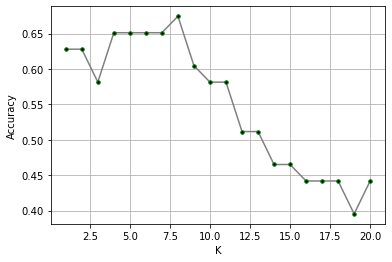

In [50]:
plt.plot(K_value,accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
K=1

K=N

### Pros:

Simple and easy to implement

this is effective for the low-dimesion dataset(less number of features)

in this knn we dont have the training phrase we only have the testing phase; whenever we add the new so we can add it without the training(lazy lerner)

### Cons:
    
not suitable for the large dataset

it is not sutaible for the higher dimession

here the reason since there is no training process everything we are doing on a distance 

not sutaible for the imbalnced data

it is not sutaible for the outlier

it is not sutabile for the large scaled or data without scaling
